In [18]:
from sklearn.datasets import fetch_openml
import pandas as pd
# import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [19]:
mnist = fetch_openml('mnist_784', as_frame=False)
data = mnist.data
target = mnist.target.astype(np.uint8)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=42)
X_train = X_train / 255.0  # Normalise pixel values
X_test = X_test / 255.0

In [20]:
# Initialise params using Xavier initialisation
def init_params():
    w1 = np.random.randn(10, 784) * np.sqrt(2 / 784)  # Xavier initialisation
    b1 = np.zeros((10, 1))
    w2 = np.random.randn(10, 10) * np.sqrt(2 / 10)  # Xavier initialisation
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2

# Define ReLU activation function
def ReLU(z):
    return np.maximum(z, 0)

# Define softmax activation function
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtracting max(z) for numerical stability
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# Forward propagation
def forward_prop(w1, b1, w2, b2, X):
    z1 = np.dot(w1, X.T) + b1
    a1 = ReLU(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

# Backward propagation
def backward_prop(z1, a1, z2, a2, w1, w2, X, y):
    m = X.shape[0]
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(w2.T, dz2) * ReLU_deriv(z1)
    dw1 = (1 / m) * np.dot(dz1, X)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    return dw1, db1, dw2, db2

# Update parameters
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    return w1, b1, w2, b2

# One-hot encoding
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T

# ReLU derivative
def ReLU_deriv(z):
    return z > 0

# Training the neural network
def train_neural_network(X_train, y_train, alpha, epochs):
    w1, b1, w2, b2 = init_params()
    for i in range(epochs):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X_train)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, X_train, y_train)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            train_loss = compute_loss(a2, one_hot(y_train))
            print(f"Iteration: {i}, Training Loss: {train_loss}")
    return w1, b1, w2, b2

# Compute cross-entropy loss
def compute_loss(a2, y):
    m = y.shape[1]
    return -np.sum(y * np.log(a2)) / m

# Test the trained model
def test_neural_network(X_test, y_test, w1, b1, w2, b2):
    z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X_test)
    predictions = get_predictions(a2)
    accuracy = get_accuracy(predictions, y_test)
    print(f"Test Accuracy: {accuracy}")

# Get predictions
def get_predictions(a2):
    return np.argmax(a2, axis=0)

# Get accuracy
def get_accuracy(predictions, y):
    return np.mean(predictions == y) * 100

In [23]:
def gradient_descent(X, y, X_test, y_test, epochs, alpha):
    w1, b1, w2, b2 = init_params()
    
    for i in range(epochs + 1):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, X, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        
        if i % 10 == 0 or i == epochs:
            print(f"Epoch Number: {i}/{epochs}")
            train_predictions = get_predictions(a2)
            train_accuracy = get_accuracy(train_predictions, y)
            print("    Training Accuracy:", train_accuracy)
            
            # Forward propagation for test set
            _, _, _, a2_test = forward_prop(w1, b1, w2, b2, X_test)
            test_predictions = get_predictions(a2_test)
            test_accuracy = get_accuracy(test_predictions, y_test)
            print("    Test Accuracy:", test_accuracy)
            print("-----------------------------------------------------------------------")
    
    return w1, b1, w2, b2


epochs = 100
alpha = 0.1

w1, b1, w2, b2 = gradient_descent(X_train, y_train, X_test, y_test, epochs, alpha)


Epoch Number: 0/100
    Training Accuracy: 11.134285714285715
    Test Accuracy: 17.119999999999997
-----------------------------------------------------------------------
Epoch Number: 10/100
    Training Accuracy: 32.362857142857145
    Test Accuracy: 33.12571428571429
-----------------------------------------------------------------------
Epoch Number: 20/100
    Training Accuracy: 45.59142857142857
    Test Accuracy: 45.98571428571429
-----------------------------------------------------------------------
Epoch Number: 30/100
    Training Accuracy: 55.23142857142857
    Test Accuracy: 55.817142857142855
-----------------------------------------------------------------------
Epoch Number: 40/100
    Training Accuracy: 63.64857142857143
    Test Accuracy: 63.92285714285715
-----------------------------------------------------------------------
Epoch Number: 50/100
    Training Accuracy: 70.07142857142857
    Test Accuracy: 70.52571428571429
-------------------------------------------

In [25]:
def predict(X, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[index, :]
    prediction_array = predict(current_image, w1, b1, w2, b2)
    prediction = np.argmax(prediction_array)  # Select the label with the highest probability
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_predictions = predict(X_test, w1, b1, w2, b2)
get_accuracy(test_predictions, y_test)

82.43142857142857

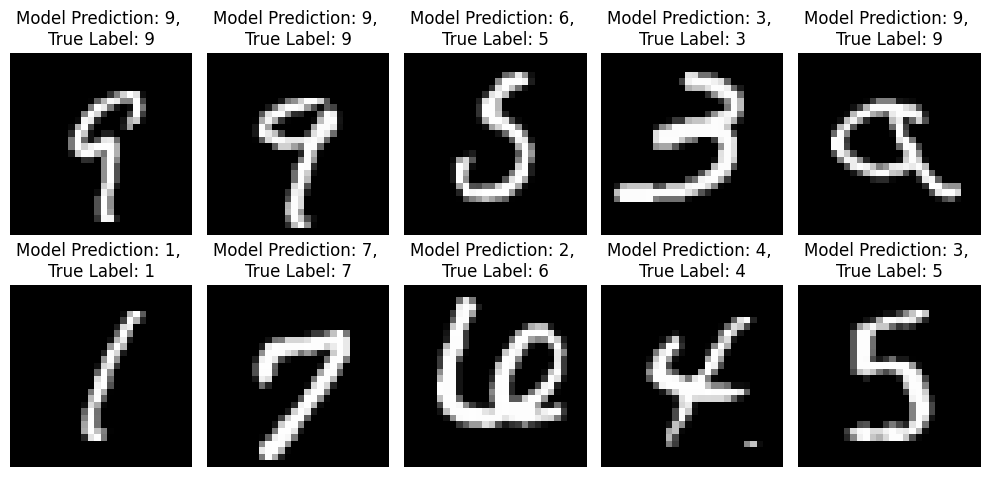

In [30]:
def plot_images(images, predictions, labels):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Model Prediction: {predictions[i]}, \nTrue Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

#np.random.seed(42)

# Pick 10 random indices from the testelopment set
random_indices = np.random.choice(len(X_test), size=10, replace=False)
random_images = X_test[random_indices]
random_predictions = test_predictions[random_indices]
random_labels = y_test[random_indices]
plot_images(random_images, random_predictions, random_labels)